First we create and train the model (if the model has already existed in the directory, please delete it at first)

Joint Testing for all algorithms
Loading data for  ukdale  dataset
Dropping missing values
Generating predictions for : CNN
Inference Time Consumption: 0.0020020008087158203s.
............  mae  ..............
                       CNN
washing machine  10.182229
............  rmse  ..............
                      CNN
washing machine  55.88077
............  f1score  ..............
                     CNN
washing machine  0.73276
............  recall  ..............
                      CNN
washing machine  0.699229
............  precision  ..............
                      CNN
washing machine  0.769669


d:\Anaconda3\envs\nilmtk-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
d:\Anaconda3\envs\nilmtk-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


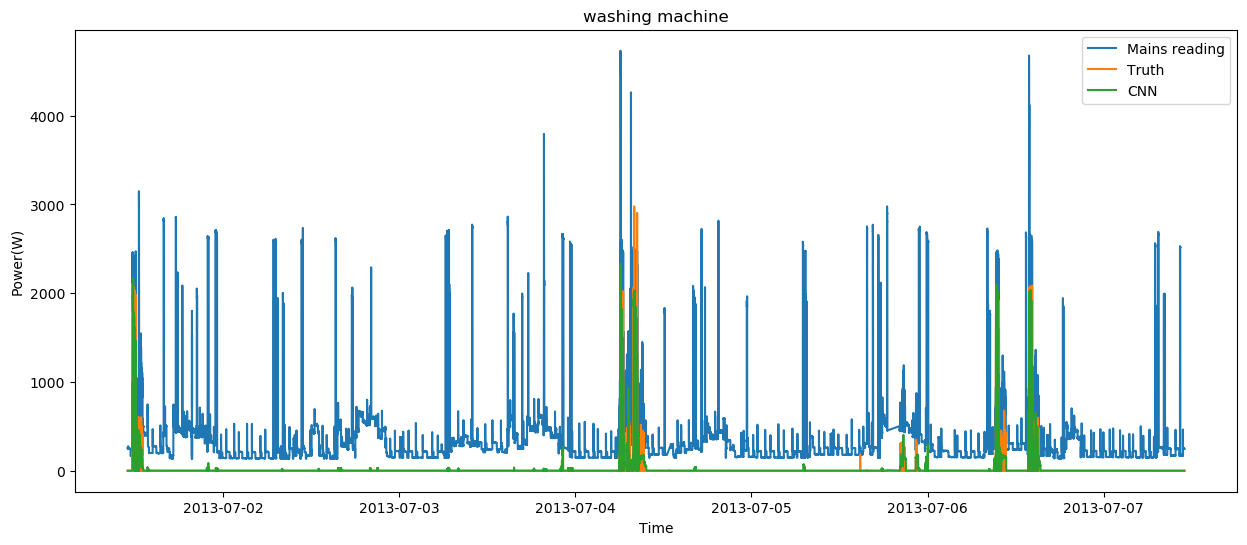

In [1]:
from model import CNN_MODULE
from nilmtk.api import API

if __name__ =='__main__':
    
    experiment_pruner = {
        'power': {
            'mains': ['active'],
            'appliance': ['active']
        },
        'sample_rate': 6,
        'appliances': ['washing machine'],
        'pre_trained':False,
        'methods':{
        "CNN":CNN_MODULE({'n_epochs':10, 'batch_size':256, 'sequence_length':200, 'on_threshold':
                        {'washing machine': 20}})},
        'train': {
            'datasets':{
            'ukdale': {
                'path': '../data/ukdale.h5',
                'buildings': {
                    1: {
                            'start_time': '2013-06-01',
                            'end_time': '2013-07-01'
                        }
                    }
                },      
            }
        },
        'test': {
            'datasets':{
            'ukdale': {
                'path': '../data/ukdale.h5',
                'buildings': {
                    1: {
                            'start_time': '2013-07-01 12:00',
                            'end_time': '2013-07-07 12:00'
                        }
                    }
                },
            },
        'metrics': ['mae','rmse','f1score','recall','precision']
        }
    }

    api_experiment_1 = API(experiment_pruner)

Then we can run *pruner.py* to prune the model.

In [2]:
!python pruner.py

Original Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 20, 2000]             160
            Conv1d-2             [-1, 20, 2000]           2,020
            Linear-3                  [-1, 100]         400,100
            Linear-4                  [-1, 200]          20,200
Total params: 422,480
Trainable params: 422,480
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.61
Params size (MB): 1.61
Estimated Total Size (MB): 2.23
----------------------------------------------------------------
Pruned Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 20, 2000]             160
            Conv1d-2             [-1, 20, 2000]           2,020
           

Closing remaining open files:C:\Users\zhang\AppData\Local\Temp\nilmtk-rgbxnp5k.h5...done


Finally, we run the API again. Instead of training the model twice, the API will accept our pruned model directly and make inference .

Joint Testing for all algorithms
Loading data for  ukdale  dataset
Dropping missing values
Generating predictions for : CNN
Inference Time Consumption: 0.0070002079010009766s.
............  mae  ..............
                      CNN
washing machine  9.719229
............  rmse  ..............
                       CNN
washing machine  55.080578
............  f1score  ..............
                      CNN
washing machine  0.735707
............  recall  ..............
                      CNN
washing machine  0.725836
............  precision  ..............
                     CNN
washing machine  0.74585


d:\Anaconda3\envs\nilmtk-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


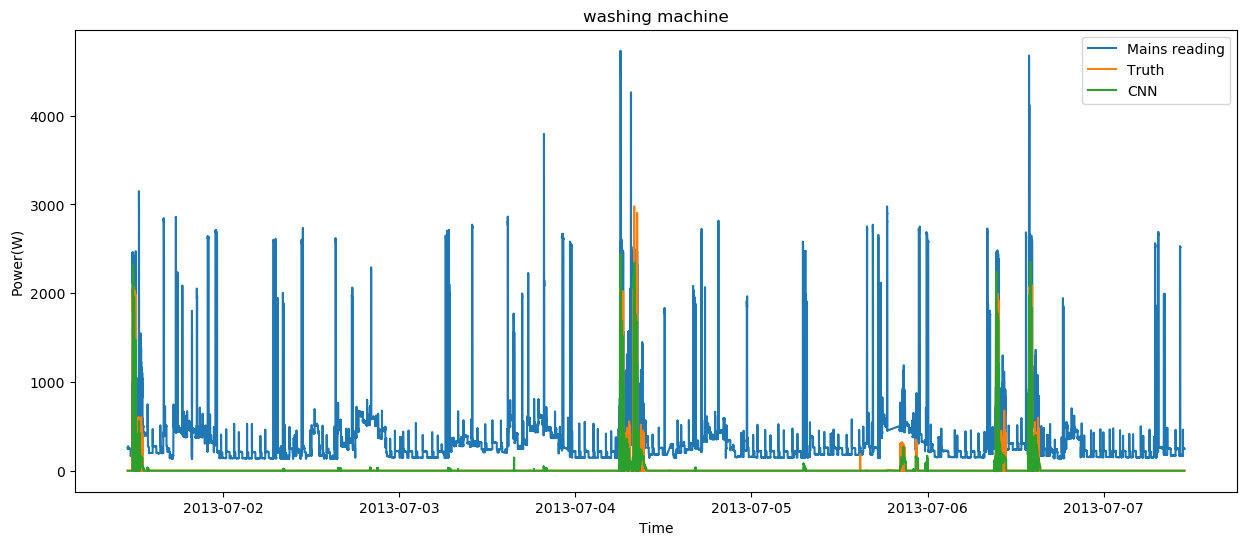

In [3]:
api_experiment_2 = API(experiment_pruner)